# CSE1015 - Machine Learning Essentials
# Pinni Venkata Abhiram
# 20BAI1132

### Lab - 7 
### Prediction of y2 and z1 value using various regression models and writing outputs for it

#### Importing the required modules

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.linear_model import LinearRegression as linearreg
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split as tsplit
from sklearn.preprocessing import MinMaxScaler
from tabulate import tabulate

### Importing of train data and analysing it

In [114]:
df = pd.read_csv('data.csv')

#### Ignorning the warnings

In [115]:
warnings.filterwarnings('ignore')

### Preprocessing the data for train set

In [116]:
df.columns


Index(['Sample Number', 'X1', 'X2', 'X3', 'Y2', 'Z1'], dtype='object')

In [117]:
df.head(10)

,Sample Number,X1,X2,X3,Y2,Z1
0,1.0,50.0,6.0,30.0,4.86,18.0
1,2.0,50.0,6.0,45.0,4.97,19.0
2,3.0,50.0,6.0,60.0,5.79,20.0
3,4.0,50.0,6.0,75.0,6.28,27.0
4,5.0,50.0,8.0,30.0,5.06,19.0
5,6.0,50.0,8.0,45.0,5.20,24.0
6,7.0,50.0,8.0,60.0,5.91,21.0
7,8.0,50.0,8.0,75.0,8.65,23.0
8,9.0,50.0,10.0,30.0,5.78,20.0
9,10.0,50.0,10.0,45.0,5.90,20.0


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sample Number  64 non-null     float64
 1   X1             66 non-null     float64
 2   X2             64 non-null     float64
 3   X3             64 non-null     float64
 4   Y2             64 non-null     float64
 5   Z1             64 non-null     float64
dtypes: float64(6)
memory usage: 3.5 KB


In [119]:
df.describe()

,Sample Number,X1,X2,X3,Y2,Z1
count,64.000000,66.000000,64.000000,64.000000,64.000000,64.000000
mean,32.500000,125.000000,9.000000,52.500000,7.531719,30.687500
std,18.618987,57.008771,2.253745,16.903085,1.299308,6.647293
min,1.000000,50.000000,6.000000,30.000000,4.860000,18.000000
25%,16.750000,62.500000,7.500000,41.250000,6.947500,25.750000
50%,32.500000,125.000000,9.000000,52.500000,7.210000,32.000000
75%,48.250000,187.500000,10.500000,63.750000,8.702500,35.250000
max,64.000000,200.000000,12.000000,75.000000,10.130000,44.000000


#### From the above describe function we can get the values of standard deviation , percentile value and many more

#### Normalisation of data using the max absolute scaling method

In [120]:
def maximum_absolute_scaling(dataFrame):
    dataFrame_scaled = dataFrame.copy()
    for column in dataFrame_scaled.columns:
        dataFrame_scaled[column] = dataFrame_scaled[column]  / dataFrame_scaled[column].abs().max()
    return dataFrame_scaled
    
# call the maximum_absolute_scaling function
df_scaled = maximum_absolute_scaling(df)

df_scaled

,Sample Number,X1,X2,X3,Y2,Z1
0,0.015625,0.25,0.500000,0.4,0.479763,0.409091
1,0.031250,0.25,0.500000,0.6,0.490622,0.431818
2,0.046875,0.25,0.500000,0.8,0.571570,0.454545
3,0.062500,0.25,0.500000,1.0,0.619941,0.613636
4,0.078125,0.25,0.666667,0.4,0.499506,0.431818
...,...,...,...,...,...,...
66,NaN,NaN,NaN,NaN,NaN,NaN
67,NaN,NaN,NaN,NaN,NaN,NaN
68,NaN,NaN,NaN,NaN,NaN,NaN
69,NaN,1.00,NaN,NaN,NaN,NaN


In [121]:
df_scaled.columns

Index(['Sample Number', 'X1', 'X2', 'X3', 'Y2', 'Z1'], dtype='object')

#### Checking for null rows , i.e. NaN rows and dropping them if there are any

In [122]:
df_scaled.isnull().sum()

Sample Number    7
X1               5
X2               7
X3               7
Y2               7
Z1               7
dtype: int64

#### Dropping the null columns 

In [123]:
df_scaled = df_scaled.dropna()

In [124]:
df_scaled.isnull().sum()

Sample Number    0
X1               0
X2               0
X3               0
Y2               0
Z1               0
dtype: int64

#### Finding the correlation for the train dataset

In [125]:
correlation = df_scaled.corr()
correlation['Y2']

Sample Number    0.497693
X1               0.374505
X2               0.392176
X3               0.662444
Y2               1.000000
Z1               0.553669
Name: Y2, dtype: float64

In [126]:
correlation = df_scaled.corr()
correlation['Z1']

Sample Number    0.935843
X1               0.894236
X2               0.254285
X3               0.137738
Y2               0.553669
Z1               1.000000
Name: Z1, dtype: float64

#### Correlation of dependent variables

In [127]:
corr1 = df_scaled.corr()['X1']
corr1

Sample Number    9.683641e-01
X1               1.000000e+00
X2              -4.121703e-16
X3               4.198031e-16
Y2               3.745051e-01
Z1               8.942364e-01
Name: X1, dtype: float64

In [128]:
corr2 = df_scaled.corr()['X2']
corr2

Sample Number    2.420910e-01
X1              -4.121703e-16
X2               1.000000e+00
X3               8.847090e-17
Y2               3.921761e-01
Z1               2.542852e-01
Name: X2, dtype: float64

In [129]:
corr3 = df_scaled.corr()['X3']
corr3

Sample Number    6.052275e-02
X1               4.198031e-16
X2               8.847090e-17
X3               1.000000e+00
Y2               6.624442e-01
Z1               1.377378e-01
Name: X3, dtype: float64

#### The target var for the question is Y2 so we find the correlation between the Y2 and the other variables
#### In the aboue result there is positive correlation and it's significant , the positive correlation means that means the values of the input variable and the output variable change in the same directions.
#### Therefore we have significant correlations so we don't drop any columns , all columns are important.

#### Plots for the train dataset (Exploratory analysis)

#### Heatmap for correlation
#### In this heatmap we can see that the correlation color is quite low and it says that there are parts which have low correlation value and high correlation value regions too so we can't remove any column

<AxesSubplot:>

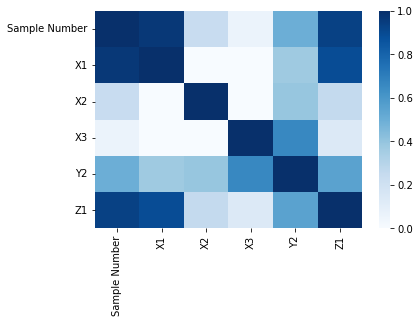

In [130]:
sns.heatmap(df_scaled.corr() , cmap="Blues")

#### Pairplot
#### Pairplot is usually a grid of plots for each variable in your dataset. Hence you can quickly see how all the variables are related. This can help to infer which variables are useful, which have skewed distribution etc.

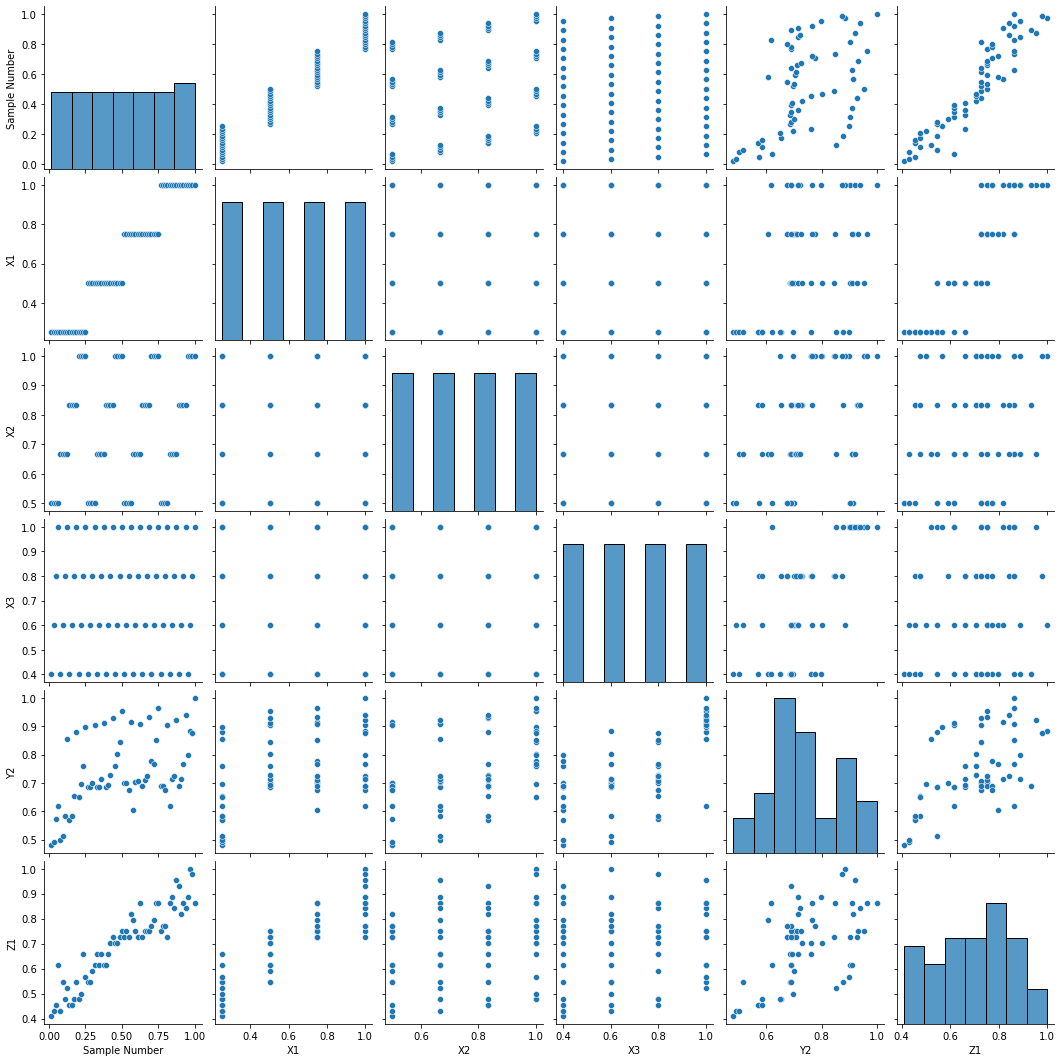

In [131]:
sns.pairplot(df_scaled)

#### Distplot

<AxesSubplot:xlabel='Y2', ylabel='Density'>

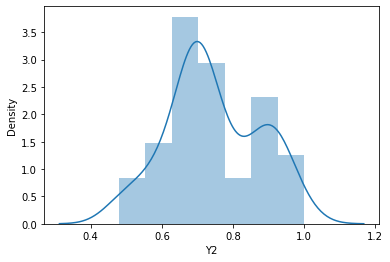

In [132]:
sns.distplot(df_scaled['Y2'])

<AxesSubplot:xlabel='X1', ylabel='Density'>

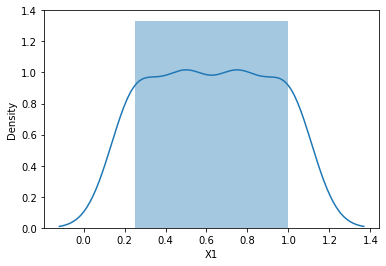

In [133]:
sns.distplot(df_scaled['X1'])

#### Linear Regression model

In [134]:
df_scaled.columns

Index(['Sample Number', 'X1', 'X2', 'X3', 'Y2', 'Z1'], dtype='object')

#### Splitting into training set and test set and getting both prediction and original dataset

In [135]:
X = df_scaled.drop(['Y2','Sample Number'],axis=1)
Y = df_scaled['Y2']



x_train , x_test, y_train , y_test = tsplit(X,Y,train_size=0.75,random_state=1)

In [136]:
x_train

,X1,X2,X3,Z1
3,0.25,0.500000,1.0,0.613636
40,0.75,0.833333,0.4,0.727273
36,0.75,0.666667,0.4,0.795455
10,0.25,0.833333,0.8,0.477273
56,1.00,0.833333,0.4,0.931818
19,0.50,0.500000,1.0,0.613636
34,0.75,0.500000,0.8,0.727273
60,1.00,1.000000,0.4,0.886364
17,0.50,0.500000,0.6,0.545455
55,1.00,0.666667,1.0,0.954545


#### Importing the linear regression module

In [137]:
linear_reg_model = linearreg()

In [138]:
linear_reg_model.fit(x_train,y_train)

LinearRegression()

#### Fitting the train dataset in the module

In [139]:
intercept = linear_reg_model.intercept_
intercept

0.17520425437085918

#### Coefficients of the linear regression model

In [140]:
coefficients = pd.DataFrame(linear_reg_model.coef_, x_train.columns, columns = ['coef']).sort_values(by = 'coef', ascending = False)
coefficients

,coef
X3,0.370483
X2,0.239545
X1,0.193792
Z1,0.022175


In [141]:
reg_equation = "Y = " + str(intercept.round(5)) + " + "
reg_equation += "(" + str(coefficients.coef['X3'].round(5)) + ")" + X.columns[0]
for i in range(1, len(X.columns)):
    col = X.columns[i]
    reg_equation += " + (" + str(coefficients.coef[col].round(5)) + ")" + col
print(reg_equation)

Y = 0.1752 + (0.37048)X1 + (0.23955)X2 + (0.37048)X3 + (0.02218)Z1


#### From the regression equation, it is evident that the variables move in same direction as compared to Y since they have the positive correlation coefficient.

#### Summary of result using the statsmodels api

In [142]:
result = sm.OLS(Y, X).fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                     Y2   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                              1827.
Date:                Thu, 17 Mar 2022   Prob (F-statistic):                    6.54e-62
Time:                        12:38:22   Log-Likelihood:                          81.162
No. Observations:                  64   AIC:                                     -154.3
Df Residuals:                      60   BIC:                                     -145.7
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### The p statistic values of columns are 0 so we move on to check the Variance Inflation Factor or VIF value
#### Based off of the VIF Values, we drop the ones with the highest VIF values. 
#### Drop unnecessary input variables

In [143]:
vif  = pd.DataFrame()
vif['variables'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

,variables,VIF
0,X1,40.571839
1,X2,25.954524
2,X3,11.838202
3,Z1,140.149563


#### The Z1 factor in here is having a huge vif value so we drop it

In [144]:
X = X.drop(columns='Z1')

In [145]:
vif  = pd.DataFrame()
vif['variables'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

,variables,VIF
0,X1,5.0625
1,X2,8.4925
2,X3,7.4925


#### Now that we have the VIF values sorted out the remaining columns are X1 , X2 and X3

In [146]:
result = sm.OLS(Y, X).fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                     Y2   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                              2183.
Date:                Thu, 17 Mar 2022   Prob (F-statistic):                    5.46e-62
Time:                        12:38:23   Log-Likelihood:                          77.161
No. Observations:                  64   AIC:                                     -148.3
Df Residuals:                      61   BIC:                                     -141.8
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### We calculate the linear regression model again 

In [147]:
regression_model = linearreg()
regression_model.fit(X,Y)
print("Intercept : ",regression_model.intercept_)
print("Coefficients : ",regression_model.coef_)

x_train = np.column_stack((x_train['X1'],x_train['X2'],x_train['X3'])) 
y_train = y_train
x_train = sm.add_constant(x_train)
estimate = sm.OLS(y_train, x_train).fit()
print(estimate.summary())

Intercept :  0.172161895360316
Coefficients :  [0.17050839 0.2678307  0.37700518]
                            OLS Regression Results                            
Dep. Variable:                     Y2   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     49.70
Date:                Thu, 17 Mar 2022   Prob (F-statistic):           3.51e-14
Time:                        12:38:23   Log-Likelihood:                 63.798
No. Observations:                  48   AIC:                            -119.6
Df Residuals:                      44   BIC:                            -112.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------

In [148]:
print("Regression Equation: ")
yx = f"Y = {regression_model.intercept_.round(3)}+ ({regression_model.coef_[0].round(3)})X1 + ({regression_model.coef_[1].round(3)})X2 + ({regression_model.coef_[2].round(3)})X3"
print(yx)

Regression Equation: 
Y = 0.172+ (0.171)X1 + (0.268)X2 + (0.377)X3


#### Performance Metrics for Linear Regression

#### Scatter plot for X1

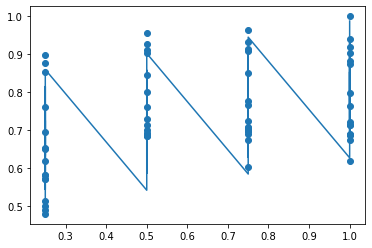

In [149]:
plt.scatter(X['X1'],Y)
eq = X*regression_model.coef_
eq = eq.sum(axis=1)+regression_model.intercept_
plt.plot(X['X1'], eq)

#### Scatter plot for X2

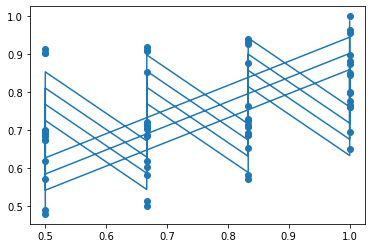

In [150]:
plt.scatter(X['X2'],Y)
eq = X*regression_model.coef_
eq = eq.sum(axis=1)+regression_model.intercept_
plt.plot(X['X2'], eq)

#### Finding and comparing the prediction values with actual values

In [151]:
y_test.head(5)

24    0.687068
39    0.909181
52    0.617966
27    0.926950
44    0.776900
Name: Y2, dtype: float64

#### Since we dropped Z1 we drop the same in the train set

In [152]:
x_test = x_test.drop(['Z1'],axis=1)

In [153]:
predictions = regression_model.predict(x_test)
print(predictions)

[0.63141041 0.85560217 0.67202616 0.85761352 0.71867596 0.65030849
 0.662173   0.91210513 0.74943855 0.77818978 0.78020114 0.82282823
 0.81096372 0.78221249 0.79206565 0.70278875]


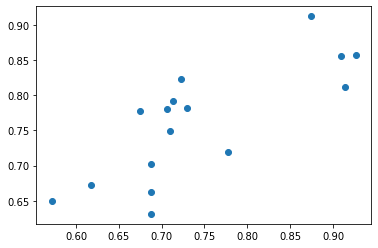

In [154]:
plt.scatter(y_test, predictions)

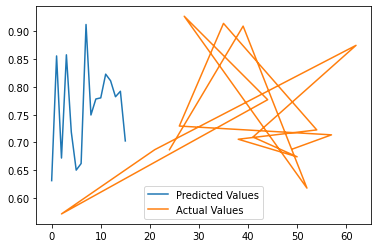

In [155]:
plt.plot(predictions, label = 'Predicted Values')
plt.plot(y_test, label = 'Actual Values')
plt.legend()

#### Comparing the linear regression predicted vs actual values


In [156]:
predictions_list = predictions.tolist()
Y_test_list = y_test.tolist()
print("Actual\tPredicted")
for i in range(len(Y_test_list)):
    print(Y_test_list[i], "\t" ,predictions_list[i])

Actual	Predicted
0.6870681145113524 	 0.631410414610069
0.9091806515301086 	 0.8556021717670287
0.6179664363277393 	 0.6720261599210265
0.926949654491609 	 0.8576135241855873
0.7769002961500493 	 0.7186759624876603
0.5715695952615991 	 0.6503084896347483
0.6870681145113524 	 0.6621730009871668
0.874629812438302 	 0.9121051332675221
0.7097729516288253 	 0.749438548864758
0.6742349457058242 	 0.7781897828232972
0.7058242843040473 	 0.7802011352418559
0.7226061204343533 	 0.8228282329713721
0.9141164856860808 	 0.8109637216189537
0.7295162882527146 	 0.7822124876604145
0.7137216189536032 	 0.7920656465942744
0.6880552813425468 	 0.7027887462981244


#### Final Evaluation metrics and tabulations for linear regression

In [157]:
MAE = metrics.mean_absolute_error(y_test, predictions)
MSE = metrics.mean_squared_error(y_test,predictions)
RMSE = np.sqrt(MSE)
R_squared = result.rsquared
adjusted_R_squared = result.rsquared_adj

print("MSE (Mean Squared Error) : ", + MSE)
print("MAE (Mean Absolute Error): ", + MAE)
print("RMSE (Root Mean Squared Error ) : ", + RMSE)
print("Adjusted R squared value : " , adjusted_R_squared)

MSE (Mean Squared Error) :  0.00456506487395412
MAE (Mean Absolute Error):  0.06244447186574532
RMSE (Root Mean Squared Error ) :  0.06756526381177032
Adjusted R squared value :  0.9903158257316342


In [158]:
table_testing = [
                ['Input Variable Names', 'Regression', 'MSE', 'MAE', 'RMSE', 'R-Squared', 'Adjusted R-Squared'],
                [[X.columns[0],X.columns[1],X.columns[2]], yx, MSE, MAE, RMSE, R_squared, adjusted_R_squared]
                ]
print(tabulate(table_testing, headers='firstrow'))

Input Variable Names    Regression                                           MSE        MAE       RMSE    R-Squared    Adjusted R-Squared
----------------------  --------------------------------------------  ----------  ---------  ---------  -----------  --------------------
['X1', 'X2', 'X3']      Y = 0.172+ (0.171)X1 + (0.268)X2 + (0.377)X3  0.00456506  0.0624445  0.0675653      0.99077              0.990316


#### Linear Regression model is successfully implemented , Stage - I classifier is implemented successfully

#### Stage - II Classifier using the Y2 and output as Z1

####  In this case the predictions are the input and the output is Z1 so we take data according to that

In [159]:
X1 = df_scaled.iloc[:,3:4].values
Y1 = df_scaled.iloc[:,4].values

x_train1 , x_test1, y_train1 , y_test1 = tsplit(X1,Y1,train_size=0.75,random_state=1)

In [160]:
regression_model = linearreg()
regression_model.fit(x_train1,y_train1)
print("Intercept : ",regression_model.intercept_)
print("Coefficients : ",regression_model.coef_)


Intercept :  0.46954264056037376
Coefficients :  [0.3933286]


In [161]:
print("Regression Equation: ")
yx = f"Z1 = {regression_model.intercept_.round(3)}+ ({regression_model.coef_[0].round(3)})Y2"
print(yx)

Regression Equation: 
Z1 = 0.47+ (0.393)Y2


#### Predictions

In [162]:
predictions = regression_model.predict(x_test1)
print(predictions)

[0.62687408 0.86287124 0.62687408 0.86287124 0.62687408 0.78420552
 0.7055398  0.78420552 0.7055398  0.78420552 0.78420552 0.78420552
 0.86287124 0.78420552 0.7055398  0.7055398 ]


In [163]:
predictions = regression_model.predict(x_test1)
print(predictions)

[0.62687408 0.86287124 0.62687408 0.86287124 0.62687408 0.78420552
 0.7055398  0.78420552 0.7055398  0.78420552 0.78420552 0.78420552
 0.86287124 0.78420552 0.7055398  0.7055398 ]


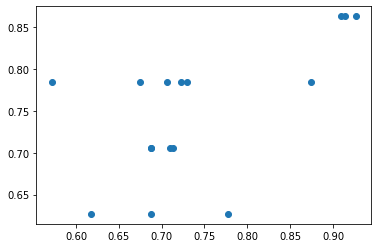

In [164]:
plt.scatter(y_test1, predictions)

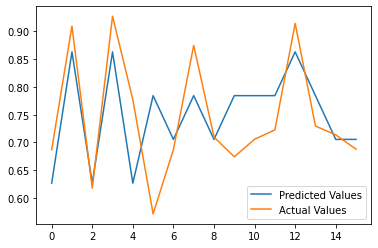

In [165]:
plt.plot(predictions, label = 'Predicted Values')
plt.plot(y_test1, label = 'Actual Values')
plt.legend()

In [166]:
predictions_list = predictions.tolist()
Y_test_list = y_test1.tolist()
print("Actual\tPredicted")
for i in range(len(Y_test_list)):
    print(Y_test_list[i], "\t" ,predictions_list[i])

Actual	Predicted
0.6870681145113524 	 0.6268740820650334
0.9091806515301086 	 0.8628712443220228
0.6179664363277393 	 0.6268740820650334
0.926949654491609 	 0.8628712443220228
0.7769002961500493 	 0.6268740820650334
0.5715695952615991 	 0.784205523569693
0.6870681145113524 	 0.7055398028173632
0.874629812438302 	 0.784205523569693
0.7097729516288253 	 0.7055398028173632
0.6742349457058242 	 0.784205523569693
0.7058242843040473 	 0.784205523569693
0.7226061204343533 	 0.784205523569693
0.9141164856860808 	 0.8628712443220228
0.7295162882527146 	 0.784205523569693
0.7137216189536032 	 0.7055398028173632
0.6880552813425468 	 0.7055398028173632


#### Evaluation Metrics for the stage of linear regression

In [167]:
MAE = metrics.mean_absolute_error(y_test1, predictions)
MSE = metrics.mean_squared_error(y_test1,predictions)
RMSE = np.sqrt(MSE)
R_squared = result.rsquared
adjusted_R_squared = result.rsquared_adj

print("MSE (Mean Squared Error) : ", + MSE)
print("MAE (Mean Absolute Error): ", + MAE)
print("RMSE (Root Mean Squared Error ) : ", + RMSE)
print("Adjusted R squared value : " , adjusted_R_squared)

MSE (Mean Squared Error) :  0.007139507515967515
MAE (Mean Absolute Error):  0.06480204990608898
RMSE (Root Mean Squared Error ) :  0.08449560648913951
Adjusted R squared value :  0.9903158257316342


In [168]:
table_testing = [
                ['Input Variable Names', 'Regression', 'MSE', 'MAE', 'RMSE', 'R-Squared', 'Adjusted R-Squared'],
                [["Y2"], yx, MSE, MAE, RMSE, R_squared, adjusted_R_squared]
                ]
print(tabulate(table_testing, headers='firstrow'))

Input Variable Names    Regression                   MSE       MAE       RMSE    R-Squared    Adjusted R-Squared
----------------------  --------------------  ----------  --------  ---------  -----------  --------------------
['Y2']                  Z1 = 0.47+ (0.393)Y2  0.00713951  0.064802  0.0844956      0.99077              0.990316


In [169]:
print(adjusted_R_squared * 100, '%')

99.03158257316342 %


#### The stage-2 classifier is successfully implemented

#### Ridge Regression

In [170]:
from sklearn.linear_model import Ridge, RidgeCV

In [171]:
alphas = np.random.uniform(0, 10, 50)
ridge_cv = RidgeCV(alphas = alphas, cv = 10, normalize = True)
ridge_cv.fit(x_train, y_train)

RidgeCV(alphas=array([2.64622866, 8.20700184, 1.4358511 , 2.96282166, 0.4294258 ,
       8.24574779, 9.95486947, 5.36360313, 5.86039281, 5.74984489,
       8.84132344, 1.38484143, 1.53289438, 6.59504622, 9.03257259,
       8.73769849, 8.92347779, 2.85696608, 3.97698703, 1.43502585,
       2.56772984, 4.69225411, 9.15570967, 1.38953841, 3.62202473,
       0.73594445, 7.58131881, 7.26764315, 7.41427482, 0.81228971,
       2.61303871, 7.66607708, 1.19461337, 3.58482402, 5.33724723,
       1.11810343, 0.17510032, 4.39146303, 6.45776003, 0.52398068,
       7.68623512, 7.2094711 , 5.47348161, 7.57078884, 1.23407969,
       5.49115998, 4.20453938, 2.47312986, 7.75773519, 4.36418546]),
        cv=10, normalize=True)

In [172]:
alpha = ridge_cv.alpha_
alpha

0.17510032146011656

In [173]:
ridge = Ridge(alpha = ridge_cv.alpha_)
ridge.fit(x_train, y_train)

Ridge(alpha=0.17510032146011656)

In [174]:
ridge.score(x_train, y_train)

0.7693457273119121

In [175]:
def adj_r2(X, y, model):
    r2 = model.score(X, y)
    n = X.shape[0]
    p = X.shape[1]
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    
    return adjusted_r2

In [176]:
print(adj_r2(x_train, y_train, ridge))

0.7478895158990667


In [177]:
print("Regression Equation: ")
yx = f"Y = {ridge.intercept_.round(3)}+ ({ridge.coef_[0].round(3)})X1 + ({ridge.coef_[1].round(3)})X2 + ({ridge.coef_[2].round(3)})X3"
print(yx)

Regression Equation: 
Y = 0.215+ (0.0)X1 + (0.196)X2 + (0.224)X3


# Ridge Stage 2

In [178]:
regression_model1 = Ridge()
regression_model1.fit(x_train1,y_train1)
print("Intercept : ",ridge.intercept_)
print("Coefficients : ",ridge.coef_)

Intercept :  0.2148791652702905
Coefficients :  [0.         0.19638091 0.2243525  0.3495057 ]


In [179]:
predictions1 = regression_model1.predict(x_test1)
print(predictions1)

[0.65956705 0.82925735 0.65956705 0.82925735 0.65956705 0.77269392
 0.71613048 0.77269392 0.71613048 0.77269392 0.77269392 0.77269392
 0.82925735 0.77269392 0.71613048 0.71613048]


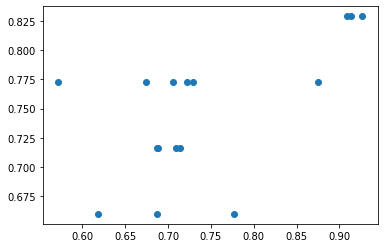

In [180]:
plt.scatter(y_test1, predictions1)

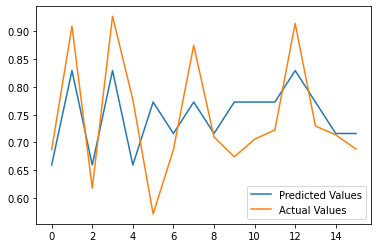

In [181]:
plt.plot(predictions1, label = 'Predicted Values')
plt.plot(y_test1, label = 'Actual Values')
plt.legend()

In [182]:
predictions_list1 = predictions1.tolist()
Y_test_list1 = y_test1.tolist()
print("Actual\t\t\t Predicted")
for i in range(len(Y_test_list1)):
    print(Y_test_list1[i], "\t" ,predictions_list1[i])

Actual			 Predicted
0.6870681145113524 	 0.6595670472571161
0.9091806515301086 	 0.8292573505329799
0.6179664363277393 	 0.6595670472571161
0.926949654491609 	 0.8292573505329799
0.7769002961500493 	 0.6595670472571161
0.5715695952615991 	 0.772693916107692
0.6870681145113524 	 0.716130481682404
0.874629812438302 	 0.772693916107692
0.7097729516288253 	 0.716130481682404
0.6742349457058242 	 0.772693916107692
0.7058242843040473 	 0.772693916107692
0.7226061204343533 	 0.772693916107692
0.9141164856860808 	 0.8292573505329799
0.7295162882527146 	 0.772693916107692
0.7137216189536032 	 0.716130481682404
0.6880552813425468 	 0.716130481682404


In [183]:
result1 = sm.OLS(x_train1, y_train1).fit()

In [184]:
MAE2 = metrics.mean_absolute_error(y_test1, predictions1)
MSE2 = metrics.mean_squared_error(y_test1,predictions1)
RMSE2 = np.sqrt(MSE2)
R_squared21 = result1.rsquared
adjusted_R_squared1 = result1.rsquared_adj

print("MSE (Mean Squared Error) : ", + MSE)
print("MAE (Mean Absolute Error): ", + MAE)
print("RMSE (Root Mean Squared Error ) : ", + RMSE)
print("Adjusted R squared value : " , + adjusted_R_squared1 )

MSE (Mean Squared Error) :  0.007139507515967515
MAE (Mean Absolute Error):  0.06480204990608898
RMSE (Root Mean Squared Error ) :  0.08449560648913951
Adjusted R squared value :  0.9433743789435787


In [185]:
print( R_squared21* 100, '%')

94.4554079382254 %


In [186]:
print("Regression Equation: ")
yx = f"Z1 = {regression_model1.intercept_.round(3)}+ ({regression_model1.coef_[0].round(3)})Y2"
print(yx)

Regression Equation: 
Z1 = 0.546+ (0.283)Y2


#### Lasso Regression

#### Stage - 1 for the lasso regression

In [187]:
from sklearn.linear_model import Lasso

In [188]:
x_train , x_test, y_train , y_test = tsplit(X,Y,train_size=0.75,random_state=1)

lasso = Lasso(alpha=1)
lasso.fit(x_train, y_train)

Lasso(alpha=1)

In [216]:
y_pred = lasso.predict(x_test)
y_test

24    0.687068
39    0.909181
52    0.617966
27    0.926950
44    0.776900
2     0.571570
21    0.687068
62    0.874630
41    0.709773
50    0.674235
38    0.705824
54    0.722606
35    0.914116
26    0.729516
57    0.713722
49    0.688055
Name: Y2, dtype: float64

In [190]:
y_pred

array([0.74323379, 0.74323379, 0.74323379, 0.74323379, 0.74323379,
       0.74323379, 0.74323379, 0.74323379, 0.74323379, 0.74323379,
       0.74323379, 0.74323379, 0.74323379, 0.74323379, 0.74323379,
       0.74323379])

In [191]:
def adj_r2(X, y, model):
    r2 = model.score(X, y)
    n = X.shape[0]
    p = X.shape[1]
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    
    return adjusted_r2

In [192]:
print(-(adj_r2(x_train, y_train, lasso)))

0.06818181818181812


In [193]:
result = sm.OLS(y_train, x_train).fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                     Y2   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                              1608.
Date:                Thu, 17 Mar 2022   Prob (F-statistic):                    9.15e-46
Time:                        12:38:30   Log-Likelihood:                          57.785
No. Observations:                  48   AIC:                                     -109.6
Df Residuals:                      45   BIC:                                     -104.0
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [217]:
from sklearn.metrics import r2_score
MAE2 = metrics.mean_absolute_error(y_test, y_pred)
MSE2 = metrics.mean_squared_error(y_test, y_pred)
RMSE2 = np.sqrt(MSE2)
R_squared = r2_score(y_test,y_pred)

print("MSE (Mean Squared Error) : ", + MSE)
print("MAE (Mean Absolute Error): ", + MAE)
print("RMSE (Root Mean Squared Error ) : ", + RMSE)
print(R_squared)

MSE (Mean Squared Error) :  0.007139507515967515
MAE (Mean Absolute Error):  0.06480204990608898
RMSE (Root Mean Squared Error ) :  0.08449560648913951
-0.00011042458390120302


In [208]:
print("Regression Equation: ")
yx = f"Y = {lasso.intercept_.round(3)}+ ({lasso.coef_[0].round(3)})X1 + ({lasso.coef_[1].round(3)})X2 + ({lasso.coef_[2].round(3)})X3"
print(yx)

Regression Equation: 
Y = 0.743+ (0.0)X1 + (0.0)X2 + (0.0)X3


### Lasso Stage 2

In [196]:
regression_model1 = Lasso()
regression_model1.fit(x_train1,y_train1)
print("Intercept : ",lasso.intercept_)
print("Coefficients : ",lasso.coef_)

Intercept :  0.7432337940111878
Coefficients :  [0. 0. 0.]


In [197]:
print("Regression Equation: ")
yx = f"Z1 = {regression_model1.intercept_.round(3)}+ ({regression_model1.coef_[0].round(3)})Y2"
print(yx)

Regression Equation: 
Z1 = 0.743+ (0.0)Y2


#### The Lasso doesn't indicate which individual regressors are "more predictive" than others. It simply has a built-in tendency to estimate coefficients as zero. The larger the penalty coefficient log(λ) is, the greater is that tendency.

In [198]:
predictions1 = regression_model1.predict(x_test1)
print(predictions1)

[0.74323379 0.74323379 0.74323379 0.74323379 0.74323379 0.74323379
 0.74323379 0.74323379 0.74323379 0.74323379 0.74323379 0.74323379
 0.74323379 0.74323379 0.74323379 0.74323379]


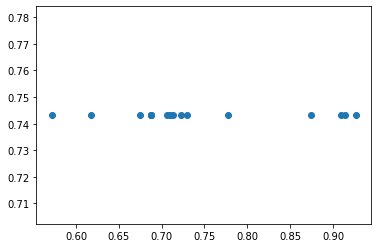

In [199]:
plt.scatter(y_test1, predictions1)

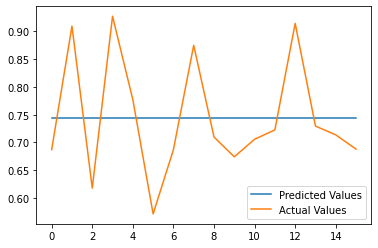

In [200]:
plt.plot(predictions1, label = 'Predicted Values')
plt.plot(y_test1, label = 'Actual Values')
plt.legend()

In [201]:
predictions_list1 = predictions1.tolist()
Y_test_list1 = y_test1.tolist()
print("Actual\t\t\t Predicted")
for i in range(len(Y_test_list1)):
    print(Y_test_list1[i], "\t" ,predictions_list1[i])

Actual			 Predicted
0.6870681145113524 	 0.7432337940111878
0.9091806515301086 	 0.7432337940111878
0.6179664363277393 	 0.7432337940111878
0.926949654491609 	 0.7432337940111878
0.7769002961500493 	 0.7432337940111878
0.5715695952615991 	 0.7432337940111878
0.6870681145113524 	 0.7432337940111878
0.874629812438302 	 0.7432337940111878
0.7097729516288253 	 0.7432337940111878
0.6742349457058242 	 0.7432337940111878
0.7058242843040473 	 0.7432337940111878
0.7226061204343533 	 0.7432337940111878
0.9141164856860808 	 0.7432337940111878
0.7295162882527146 	 0.7432337940111878
0.7137216189536032 	 0.7432337940111878
0.6880552813425468 	 0.7432337940111878


In [202]:
def adj_r21(x_train1, y_train1, model):
    r2 = model.score(X, Y)
    n = X.shape[0]
    p = X.shape[1]
    adjusted_r21 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    
    return adjusted_r21

In [203]:
result = sm.OLS(y_train, x_train).fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                     Y2   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                              1608.
Date:                Thu, 17 Mar 2022   Prob (F-statistic):                    9.15e-46
Time:                        12:38:31   Log-Likelihood:                          57.785
No. Observations:                  48   AIC:                                     -109.6
Df Residuals:                      45   BIC:                                     -104.0
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [204]:
MAE2 = metrics.mean_absolute_error(y_test1, predictions1)
MSE2 = metrics.mean_squared_error(y_test1,predictions1)
RMSE2 = np.sqrt(MSE2)
R_squared2 = result.rsquared
adjusted_R_squared = result.rsquared_adj

print("MSE (Mean Squared Error) : ", + MSE)
print("MAE (Mean Absolute Error): ", + MAE)
print("RMSE (Root Mean Squared Error ) : ", + RMSE)
print("Adjusted R squared value : " , + adjusted_R_squared )

MSE (Mean Squared Error) :  0.007139507515967515
MAE (Mean Absolute Error):  0.06480204990608898
RMSE (Root Mean Squared Error ) :  0.08449560648913951
Adjusted R squared value :  0.9901437545380545


In [205]:
print( R_squared2* 100, '%')

99.07597698794261 %


### Elastic Net Regression

#### Importing the Elastic net modules

In [206]:
from sklearn.linear_model import ElasticNet,ElasticNetCV
x_train = df_scaled.iloc[:, :4].values

In [207]:
coef_eln = []
err_eln = []
baseline = []
for a in alphas:
    elastic_net = ElasticNet(alpha = a, l1_ratio=0.5)
    elastic_net.fit(x_train, y_train)
    coef_eln.append(elastic_net.coef_)
    y_pred = elastic_net.predict(x_test)
    elasticnet_error = metrics.mean_squared_error(y_pred, y_test)
    elasticnet_error = elasticnet_error / np.linalg.norm(y_test)
    err_eln.append(elasticnet_error)
    baseline.append(baseline_error)

ValueError: Found input variables with inconsistent numbers of samples: [64, 48]

In [ ]:
alpha = E_cv.alpha_
alpha

9.862495519152226

In [ ]:
elastic= ElasticNet(alpha = E_cv.alpha_)
elastic.fit(x_train, y_train)

ElasticNet(alpha=9.862495519152226)

In [ ]:
elastic.score(x_train, y_train)

0.0